## Understanding the scenario

## Let’s assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. 
## She has collected some measurements associated with each iris, which are:

## the length and width of the petals
## the length and width of the sepals, all measured in centimetres.

## She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to 
## the species setosa, versicolor, or virginica. For these measurements, she can be certain of which species each iris belongs to. 
## We will consider that these are the only species our botanist will encounter.

## The goal is to create a machine learning model that can learn from the measurements of these irises whose species are already known, 
## so that we can predict the species for the new irises that she has found.

In [3]:
import pandas as pd

In [4]:
# Load dataset

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
ds = pd.read_csv('~/MyWorkPython/csv/iris-flower.csv', names=names)

In [5]:
ds.head()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
ds.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

<Figure size 432x288 with 0 Axes>

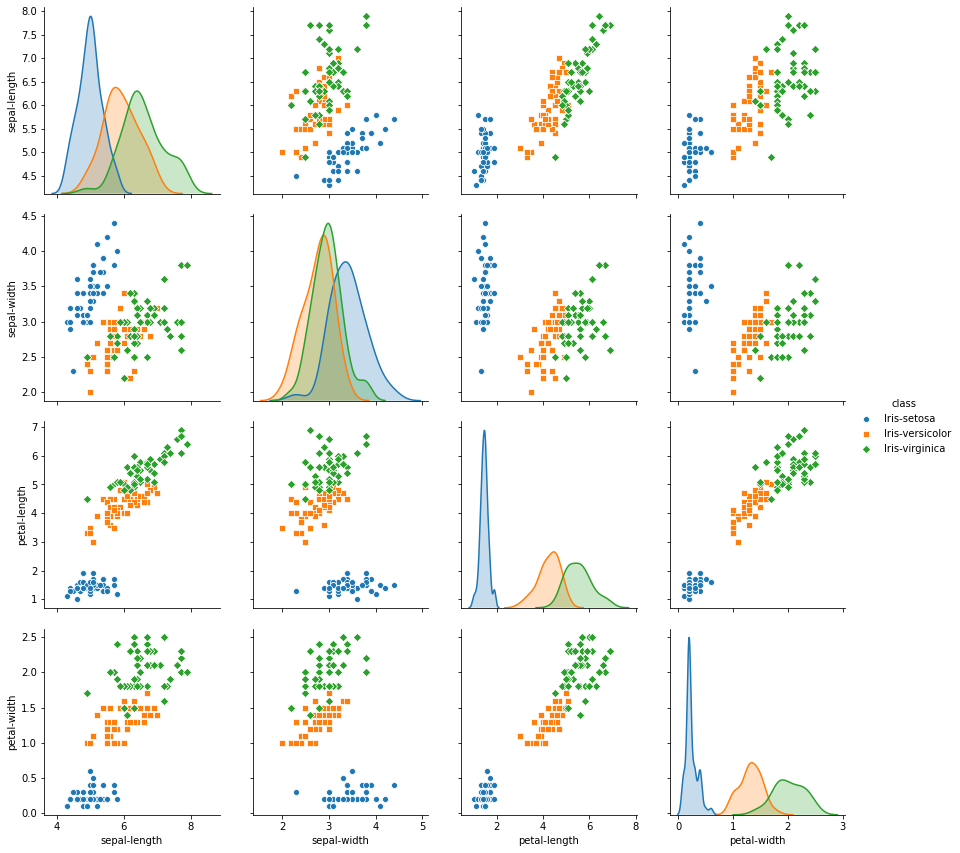

In [8]:
plt.figure()
sns.pairplot(ds, hue = "class", size=3, markers=["o", "s", "D"])
plt.show()

### Boxplots

In [ ]:
plt.figure()
ds.boxplot(by="class", figsize=(15, 10))
plt.show()

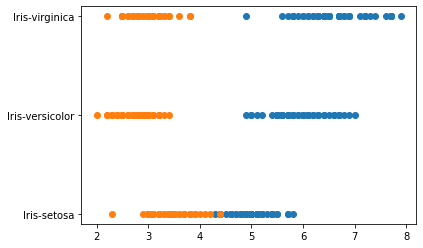

In [11]:
ds['sepal-length']

plt.scatter(ds['sepal-length'],ds['class'])
plt.scatter(ds['sepal-width'],ds['class'])

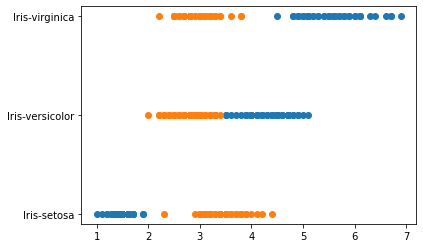

In [12]:
plt.scatter(ds['petal-length'],ds['class'])
plt.scatter(ds['sepal-width'],ds['class'])

## K nearest neighbors or KNN Algorithm is a simple algorithm which uses the entire dataset in its training phase. Whenever a prediction is required for an unseen data instance, it searches through the entire training dataset for k-most similar instances and the data with the most similar instance is finally returned as the prediction.

## This k-Nearest Neighbors tutorial is broken down into 3 parts:

## Step 1: Calculate Euclidean Distance.
## Step 2: Get Nearest Neighbors.
## Step 3: Make Predictions.

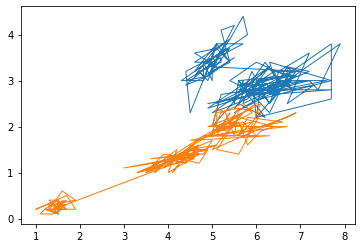

In [13]:
# Auto generate x number value list by range function.
x_number_list = list(ds['sepal-length'])

# Y axis value is assigned by x**3
y_number_list = list(ds['sepal-width'])

# Auto generate x number value list by range function.
x_number_list1 = list(ds['petal-length'])

# Y axis value is assigned by x**3
y_number_list1 = list(ds['petal-width'])

# Draw points based on above x, y value list and remove the point black outline. And the point color is green.
plt.plot(x_number_list, y_number_list, linewidth=1)

# Draw points based on above x, y value list and remove the point black outline. And the point color is green.
plt.plot(x_number_list1, y_number_list1, linewidth=1)

plt.show()


In [14]:
from math import sqrt

# Step 1: Calculate Euclidean Distance.

In [15]:
# calculate the Euclidean distance between two vectors

def euclidean_distance(r1, r2):
    distance = 0.0

    for i in range(len(r1)-1):        
        distance += (r1[i] - r2[i])**2        

    return sqrt(distance)

In [16]:
# get the distance
row0 = ds.iloc[0,0:4]
data = ds.iloc[:,0:4]

ds['distance'] = 0.0
ds['distance'].apply(pd.to_numeric)
ds['distance'].dtypes

for indexData in range(len(data)):       
    ds.at[indexData,'distance'] = euclidean_distance(row0, data.iloc[indexData,0:4])


In [17]:
ds.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,0.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,0.538516
2,4.7,3.2,1.3,0.2,Iris-setosa,0.509902
3,4.6,3.1,1.5,0.2,Iris-setosa,0.648074
4,5.0,3.6,1.4,0.2,Iris-setosa,0.141421
5,5.4,3.9,1.7,0.4,Iris-setosa,0.583095
6,4.6,3.4,1.4,0.3,Iris-setosa,0.509902
7,5.0,3.4,1.5,0.2,Iris-setosa,0.173205
8,4.4,2.9,1.4,0.2,Iris-setosa,0.921954
9,4.9,3.1,1.5,0.1,Iris-setosa,0.458258


## We can use the distance.euclidean function from scipy.spatial, a much faster way to calculate euclidean distance.

In [18]:
from scipy.spatial import distance

In [19]:
# Find the normalized vector for lebron james.

row0 = ds.iloc[0,0:4]
data = ds.iloc[:,0:4]

# Find the distance between two rows
rows_distances = ds.iloc[:,0:4].apply(lambda row: distance.euclidean(row, row0), axis=1)

# Create a new dataframe with distances.
distance_frame = pd.DataFrame(data={"dist": rows_distances, "idx": rows_distances.index})
ds['dist'] = distance_frame['dist']
#distance_frame.sort("dist", inplace=True)
distance_frame = distance_frame.sort_values('dist',axis=0)

# Find the most similar row with the lowest distance to row0

second_smallest = distance_frame.iloc[1]["idx"]

second_smallest

17.0

In [20]:
ds.head()

,sepal-length,sepal-width,petal-length,petal-width,class,distance,dist
0,5.1,3.5,1.4,0.2,Iris-setosa,0.000000,0.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,0.538516,0.538516
2,4.7,3.2,1.3,0.2,Iris-setosa,0.509902,0.509902
3,4.6,3.1,1.5,0.2,Iris-setosa,0.648074,0.648074
4,5.0,3.6,1.4,0.2,Iris-setosa,0.141421,0.141421


## 2 Using sklearn for k nearest neighbors

In [21]:
# The columns that we will be making predictions with.
x_columns = ds.iloc[:,0:4]
# The column that we want to predict.
y_column = ds.iloc[:,4]

In [22]:
x_columns

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y_column

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [45]:
### Spliting dataset into training set and test set

from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(ds.iloc[:,0:4], ds.iloc[:,4], test_size = 0.2, random_state = 0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# start with 3 nearest neighbour
model = KNeighborsClassifier(n_neighbors=3)

In [42]:
# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [47]:
#Predict Output
y_pred= model.predict(X_test) 
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [60]:
# Calculate the accuracy of the model 
model.score(X_test,y_test)

0.9666666666666667

### let's check the model accuracy

In [46]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

In [50]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy for 3 Neighbour:",metrics.accuracy_score(y_test, y_pred))

# we are getting 96.66% accuracy

Accuracy for 3 Neighbour: 0.9666666666666667


In [58]:
# start with 5 nearest neighbour
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred= model.predict(X_test) 
print("Accuracy for 5 Neighbour:",metrics.accuracy_score(y_test, y_pred))

Accuracy for 5 Neighbour: 0.9666666666666667


##  But how to decide the right k-value for the dataset? Obviously, we need to be familiar to data to get the range of expected k-value, but to get the exact k-value we need to test the model for each and every expected k-value. 

In [63]:
import numpy as np

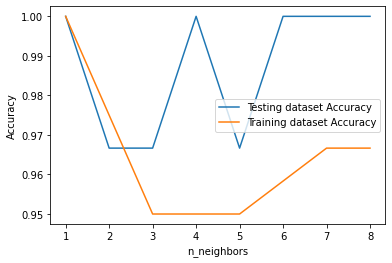

In [64]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
# Make point predictions on the test set using the fit model.
predictions = knn.predict(X_test)

TypeError: unsupported operand type(s) for /: 'str' and 'int'